In [2]:
!rm zoo.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/zoo.csv

rm: cannot remove 'zoo.csv': No such file or directory
--2021-10-23 20:04:39--  https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/zoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10171 (9.9K) [text/plain]
Saving to: ‘zoo.csv’

zoo.csv             100%[===================>]   9.93K  --.-KB/s    in 0s      

2021-10-23 20:04:39 (75.1 MB/s) - ‘zoo.csv’ saved [10171/10171]



In [3]:
import pandas as pd 

zoo = pd.read_csv("zoo.csv")

In [4]:
zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in zoo.columns:
  if (zoo[column_name].dtype == object) & (column_name!='type'):
    zoo[column_name] = le.fit_transform(zoo[column_name])

zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [6]:
# Separo "a mano" festures de target

# Features
feature_names = list(zoo.columns)
# Elimino type porque es la clase
feature_names.remove('type')
#feature_names.remove('animal')
x = zoo[feature_names]

# Target
y = zoo.type
le.fit(zoo['type'])
target_names=le.classes_

x.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
1,1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True
2,2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False
3,3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
4,4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True


In [7]:
y

0            mammal
1            mammal
2              fish
3            mammal
4            mammal
           ...     
96           mammal
97           insect
98           mammal
99     invertebrate
100            bird
Name: type, Length: 101, dtype: object

Accuracy: 0.9047619047619048


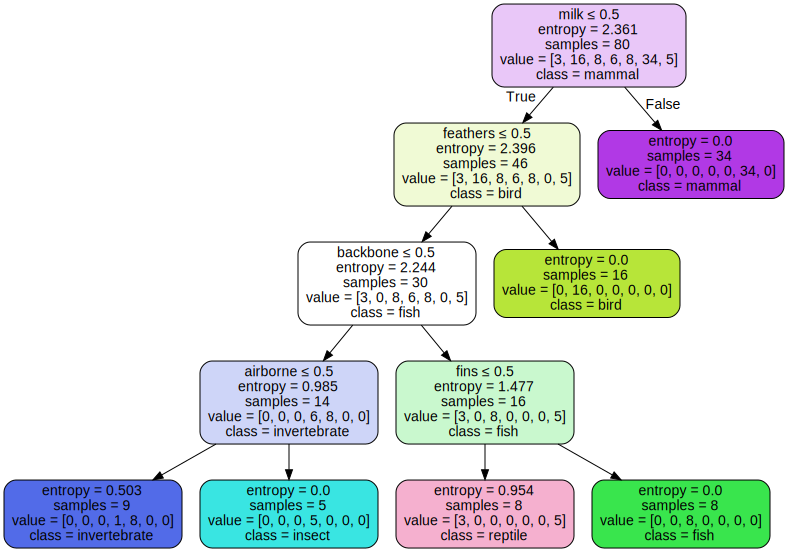

In [55]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import graphviz

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = tree.export_graphviz(arbol_parametrizado, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

No varía el resultado si eliminamos el atributo animal. No está presente en el arbol. Esto se debe a que posee una entropía muy alta, y una ganancia de información muy baja.

No es un atributo significativo a la hora de decidir que tipo de animal es.

El arbol generado posee 6 niveles.

Debemos modificar los atributos max_depth y min_samples_leaf para realizar la poda del mismo.


Accuracy: 0.9047619047619048


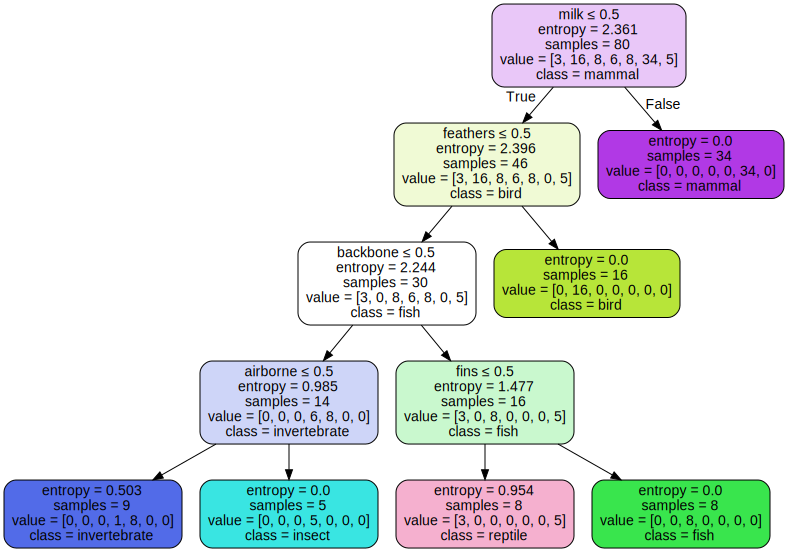

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = tree.export_graphviz(arbol_parametrizado, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

Afecta la eficiencia. Pasa de una exactitud de 95%
a 90%